In [71]:
!conda install nltk #This installs nltk
import nltk # Imports the library
nltk.download() #Download the necessary datasets

/bin/bash: conda: command not found
NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> stopwords


      Package stopwords is already up-to-date!



---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


True

In [ ]:
import pandas as pd
msg = [word.rstrip() for word in open('/content/SMSSpamCollection') ]
msg

In [7]:
print('Total msgs:',len(msg))

Total msgs: 5574


In [ ]:
for message_no,message in enumerate(msg[:10]):
  print(message_no,message)
  

In [22]:
messages = pd.read_csv('/content/SMSSpamCollection', sep='\t',
                           names=["label", "message"])
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


EDA:

In [25]:
messages.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [27]:
messages.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [30]:
print('Total length of each message in the dataset:')
messages['length'] = messages['message'].apply(len)
messages

Total length of each message in the dataset:


,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,160
5568,ham,Will ü b going to esplanade fr home?,36
5569,ham,"Pity, * was in mood for that. So...any other s...",57
5570,ham,The guy did some bitching but I acted like i'd...,125


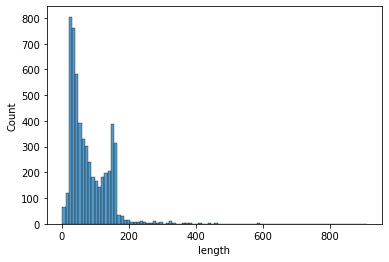

In [40]:
# print('Maximum length message:',messages['message'][messages.length==910])
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.histplot(messages['length'])

In [42]:
messages['length'].max()

910

In [44]:
print('Longest message: ')
messages['message'][messages.length==910].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

In [46]:
print('This message a Spam or a ham?',messages[messages['length']==910]['label'])
print('A ham message')

This message a Spam or a ham? 1085    ham
Name: label, dtype: object
A ham message


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


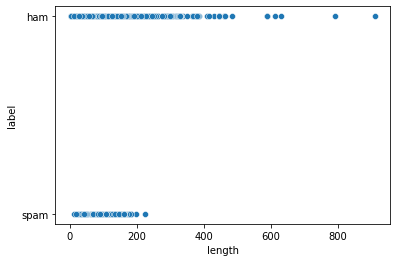

In [50]:
sns.scatterplot(messages['length'],messages['label'],data=messages)

So it seems, length can be choosen as a good criteria to detect whether a message is spam or ham.

Text preprocessing:

For classification, numerical feature vector required in order to perform the classification task.

In [93]:
import string

mess = 'Sample message! Notice: it has punctuation.'

nopunc = [x for x in mess if x not in string.punctuation]
nopunc = "".join(nopunc)
nopunc

'Sample message Notice it has punctuation'

In [94]:
from nltk.corpus import stopwords
stopwords.words('english')[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [95]:
# nopunc.split()
nopunc

'Sample message Notice it has punctuation'

In [99]:
clean_nopunc = [x for x in nopunc.split() if x.lower() not in stopwords.words('english')]

print(clean_nopunc)

['Sample', 'message', 'Notice', 'punctuation']


In [98]:
def pre_process(mess):
 
   
    nopunc = [char for char in mess if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [101]:
messages['message'].head(5).apply(pre_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

Vectorization:

In [102]:
from sklearn.feature_extraction.text import CountVectorizer

In [104]:
bow_trans = CountVectorizer(analyzer=pre_process).fit(messages['message'])
len(bow_trans.vocabulary_)

11425

In [107]:
msg4 = messages['message'][3]
print(msg4)

U dun say so early hor... U c already then say...


In [120]:
bow4 = bow_trans.transform([msg4])
print(bow4)

  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2


In [115]:
bow_trans.get_feature_names()[4068]

'U'

In [116]:
vec_messages = bow_trans.transform(messages['message'])

In [123]:
print("shape of vector msg:",vec_messages.shape)
print("no. of non zeros in vector:",vec_messages.nnz)

shape of vector msg: (5572, 11425)
no. of non zeros in vector: 50548


In [124]:
sparsity = (100.0 * vec_messages.nnz / (vec_messages.shape[0] * vec_messages.shape[1]))
print('sparsity: {}'.format(round(sparsity)))

sparsity: 0


Term weighting and normalization:

In [132]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer().fit(vec_messages)
tfidf4 = tfidf_transformer.transform(bow4)
print(tfidf4)

  (0, 9554)	0.5385626262927564
  (0, 7186)	0.4389365653379857
  (0, 6222)	0.3187216892949149
  (0, 6204)	0.29953799723697416
  (0, 5261)	0.29729957405868723
  (0, 4629)	0.26619801906087187
  (0, 4068)	0.40832589933384067


In [131]:
print(tfidf_transformer.idf_[bow_trans.vocabulary_['u']])

3.2800524267409408


In [137]:
tfidf_all=tfidf_transformer.transform(vec_messages)

In [143]:
from sklearn.naive_bayes import MultinomialNB
spam_detect_model = MultinomialNB().fit(tfidf_all, messages['label'])
print(spam_detect_model.predict(tfidf4))
print(messages['label'][3])

['ham']
ham


In [144]:
all_predictions = spam_detect_model.predict(tfidf_all)
print(all_predictions)

['ham' 'ham' 'spam' ... 'ham' 'ham' 'ham']


In [145]:
from sklearn.metrics import classification_report
print (classification_report(messages['label'], all_predictions))

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      4825
        spam       1.00      0.85      0.92       747

    accuracy                           0.98      5572
   macro avg       0.99      0.92      0.95      5572
weighted avg       0.98      0.98      0.98      5572



In [146]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(messages['message'],messages['label'],test_size=0.2,random_state=0)

Pipeline creation:

In [155]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=pre_process)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [158]:
pipeline.fit(x_train,y_train)
predictions = pipeline.predict(x_test)
print(classification_report(y_test,predictions))


              precision    recall  f1-score   support

         ham       0.96      1.00      0.98       955
        spam       1.00      0.76      0.87       160

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.96      1115



In [159]:
import joblib
model=joblib.dump(pipeline,'model_nlp.pkl')